# Ejercicio de Limpieza de Datos con el Dataset Titanic

En este notebook aprenderemos a **limpiar y preparar datos** para análisis.  
Usaremos el dataset `Titanic.csv`, que contiene información de pasajeros del Titanic, incluyendo edad, clase, género, tarifa, cabina y puerto de embarque.

El objetivo es:

- Identificar y manejar valores faltantes.
- Revisar duplicados y tipos de datos incorrectos.
- Transformar variables categóricas en formatos adecuados.
- Preparar el dataset para análisis posterior.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el dataset
df = pd.read_csv("Titanic.csv")

# Mostrar primeras filas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Conociendo el dataset

Antes de limpiar, necesitamos inspeccionar el dataset para entender:

- Número de filas y columnas.
- Tipos de datos.
- Valores faltantes.

In [4]:
# Tamaño del dataset
print("Número de filas y columnas:", df.shape)

# Tipos de datos de cada columna
print("\nTipos de datos:\n", df.dtypes)

# Información general del dataframe
df.info()

# Estadísticas descriptivas de columnas numéricas
df.describe(include='all')

Número de filas y columnas: (891, 12)

Tipos de datos:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## 2. Identificación de valores faltantes

Es importante localizar columnas con valores faltantes para decidir cómo tratarlas.

In [6]:
# Contar valores faltantes por columna
print("Valores faltantes por columna:\n", df.isnull().sum())

# Porcentaje de valores faltantes por columna
print("\nPorcentaje de valores faltantes por columna:\n", (df.isnull().sum() / df.shape[0]) * 100)

Valores faltantes por columna:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Porcentaje de valores faltantes por columna:
 PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


## 3. Duplicados

Verificaremos si existen filas duplicadas y las eliminaremos si es necesario.

In [7]:
# Contar filas duplicadas
print("Número de filas duplicadas:", df.duplicated().sum())

# Eliminar duplicados
df.drop_duplicates()

Número de filas duplicadas: 0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 4. Limpieza de columnas importantes

- La columna `Age` tiene valores faltantes: podemos rellenarlos con la mediana.
- La columna `Embarked` también tiene algunos valores faltantes: podemos rellenarlos con la moda.
- La columna `Cabin` tiene muchos valores faltantes, por lo que podemos considerar eliminarla o crear una nueva variable que indique si hay cabina registrada.

In [9]:
# Rellenar Age con la mediana
df['Age'].fillna(df['Age'].median, inplace=True)

# Rellenar Embarked con la moda
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Crear columna indicando si hay cabina
df['HasCabin'] = df['Cabin'].notnull().astype(int)

# Opcional: eliminar la columna Cabin
df.drop(columns='Cabin', inplace=True)

# Verificar cambios
df.isnull().sum()

/tmp/ipykernel_442074/2225755900.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
HasCabin       0
dtype: int64

## 5. Transformación de variables categóricas

Para análisis posteriores es útil convertir variables categóricas a numéricas o categorías:

- `Sex` a variable binaria.
- `Embarked` a variable categórica codificada.

In [10]:
# Convertir Sex a 0/1
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

# Convertir Embarked a categoría y luego a códigos
df['Embarked'] = df['Embarked'].astype('category')
df['EmbarkedCode'] = df['Embarked'].cat.codes

# Verificar transformaciones
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin,EmbarkedCode
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,1,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,0,2


## 6. Outliers y consistencia

- Revisar valores extremos en `Fare` y `Age`.
- Verificar consistencia de `SibSp` y `Parch` (número de familiares).

TypeError: Invalid object type at position 5

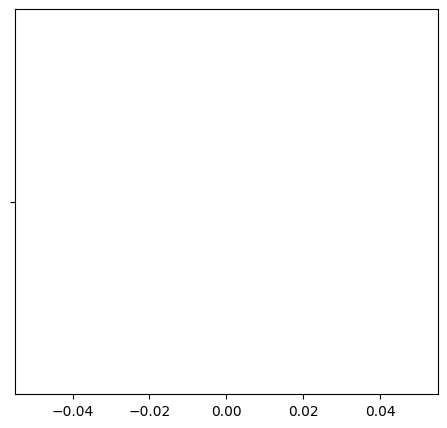

In [12]:
# Boxplot de Age y Fare
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x=df['Age'])
plt.title("Distribución de Age")

plt.subplot(1,2,2)
sns.boxplot(x=df['Fare'])
plt.title("Distribución de Fare")
plt.show()

# Estadísticas de SibSp y Parch
print("SibSp stats:\n", df['SibSp'].describe())
print("\nParch stats:\n", df['Parch'].describe())

## 7. Resumen

Ahora el dataset está limpio y listo para análisis:

- No hay valores faltantes en Age, Embarked o Sex.
- Se creó variable HasCabin.
- Variables categóricas transformadas a numéricas.

Próximos pasos posibles:

- Análisis exploratorio de datos (EDA).
- Modelos de predicción de supervivencia.
- Visualización de relaciones entre variables.